# Desafio Cientista de Dados

### Visão Geral

Análise de banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido pelo estúdio PProductions.

### Objetivos

- Demonstrar as principais características  entre as variáveis e apresentando algumas hipóteses relacionadas.
- Responder:
  <br>**a**. Qual filme você recomendaria para uma pessoa que você não conhece?
  <br>**b**. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
  <br>**c**. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
- Prever a nota do IMDB a partir dos dados
- Supor a nota do IMDB de 'The Shawshank Redemption'

### Método
1. Limpeza de dados
2. Engenharia de Atributos
3. Análise Exploratória

In [3]:
from google.colab import files

print("Por favor, carregue os arquivos necessários:")
print("1. desafio_indicium_imdb.csv")

uploaded = files.upload()

Por favor, carregue os arquivos necessários:
1. desafio_indicium_imdb.csv


Saving desafio_indicium_imdb.csv to desafio_indicium_imdb.csv


In [4]:
# Carregar o banco de dados, mostrando as primeiras linhas e informações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('desafio_indicium_imdb.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
# 1. Limpeza e pré-processamento de Dados
df_limpo = df.copy()

# Remover a coluna "Unnamed"
df_limpo = df_limpo.drop(columns=['Unnamed: 0'])

# Limpeza e conversão da coluna "Runtime"
# Converte para string e remove "min" e converte pra númerico
df_limpo['Runtime'] = pd.to_numeric(
    df_limpo['Runtime'].astype(str).str.replace(" min", "", regex=False),
    errors='coerce'
)

# Limpeza e conversão da coluna "Gross"
df_limpo['Gross'] = pd.to_numeric(
    df_limpo['Gross'].astype(str).str.replace(",", "", regex=False),
    errors='coerce'
)

# Limpeza e conversão da coluna "Released_Year"
# Converte para númerico (qualquer valor que não seja um número vira NaN)
# Preenche os NaN com zero e converte para inteiro
df_limpo['Released_Year'] = pd.to_numeric(
    df_limpo['Released_Year'],
    errors='coerce'
).fillna(0).astype(int)

# Limpeza na coluna "Meta_score"
# Converte para númerico, valores não-númericos viram NaN
df_limpo['Meta_score'] = pd.to_numeric(
    df_limpo['Meta_score'],
    errors='coerce'
)

print("Data após limpeza:")
df_limpo.info()
df_limpo.head()

Data após limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [6]:
# 2. Engenharia de Atributos

# Cria coluna "Age_Of_Movie"
# Nova variável que dirá a idade do filme em anos.
# Útil para entender se filmes mais recentes ou clássicos têm melhor desempenho!
ano_atual = 2025
df_limpo['Age_Of_Movie'] = ano_atual - df_limpo['Released_Year']

df_limpo.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Age_Of_Movie
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,53
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,17
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,51
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,68
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,22


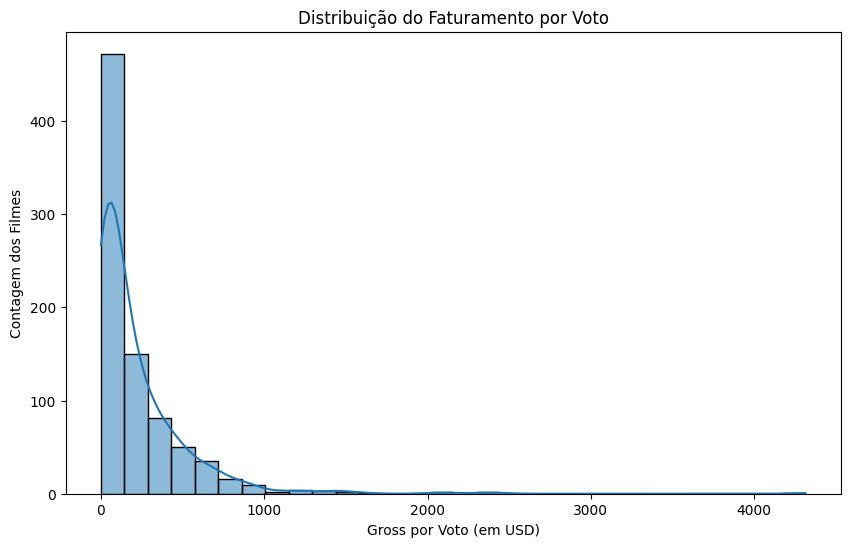

,Gross_per_Vote
count,830.000000
mean,217.311657
std,319.135570
min,0.016634
25%,29.680736
50%,104.919184
75%,291.178927
max,4314.120506


In [7]:
# Cria coluna "Gross_per_Vote"
# Nova variável para indicador da "eficiência" do faturamento do filme, mostrando quanto dinheiro ele gerou por voto recebido.

# Para evitar divisão por zero, substitui os 0s da coluna 'No_Of_Votes' por 1, se existirem.
df_limpo['No_of_Votes'] = df_limpo['No_of_Votes'].replace(0, 1)

df_limpo['Gross_per_Vote'] = df_limpo['Gross'] / df_limpo['No_of_Votes']

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_limpo['Gross_per_Vote'], bins=30, kde=True)
plt.title('Distribuição do Faturamento por Voto')
plt.xlabel('Gross por Voto (em USD)')
plt.ylabel('Contagem dos Filmes')
plt.show()

df_limpo['Gross_per_Vote'].describe()

### Interpretação dos Dados de 'Gross_per_Vote'

 Insights importantes sobre o faturamento dos filmes:
* **Grande Dispersão:** O desvio padrão de 319.14, que é superior à média (217.31), indica uma alta variação nos dados. Isso sugere que a maioria dos filmes tem um faturamento por voto modesto, enquanto um pequeno grupo de filmes obtém resultados muito acima da média.

* **Presença de Outliers:** A diferença significativa entre a média e a  mediana e a existência de um valor máximo extremo ($4314.12) confirmam a presença de *outliers*.

* **Distribuição Assimétrica:** A cauda longa da distribuição, visível no histograma, mostra que a maioria dos filmes se concentra em valores mais baixos, enquanto poucos filmes alcançam o faturamento mais alto por voto.

  A maioria dos filmes tem um **faturamento por voto relativamente baixo**.
  Filmes podem ter os maiores sucessos financeiros, mas não necessariamente são os mais bem avaliados.

                IMDB_Rating  Meta_score  No_of_Votes     Gross   Runtime  \
IMDB_Rating        1.000000    0.271374     0.479308  0.099393  0.242751   
Meta_score         0.271374    1.000000    -0.020091 -0.030480 -0.031604   
No_of_Votes        0.479308   -0.020091     1.000000  0.589527  0.172483   
Gross              0.099393   -0.030480     0.589527  1.000000  0.140002   
Runtime            0.242751   -0.031604     0.172483  0.140002  1.000000   
Age_Of_Movie       0.008223    0.099393    -0.085549 -0.036119 -0.039378   
Gross_per_Vote    -0.218989   -0.060769     0.000988  0.490762  0.070790   

                Age_Of_Movie  Gross_per_Vote  
IMDB_Rating         0.008223       -0.218989  
Meta_score          0.099393       -0.060769  
No_of_Votes        -0.085549        0.000988  
Gross              -0.036119        0.490762  
Runtime            -0.039378        0.070790  
Age_Of_Movie        1.000000        0.048114  
Gross_per_Vote      0.048114        1.000000  


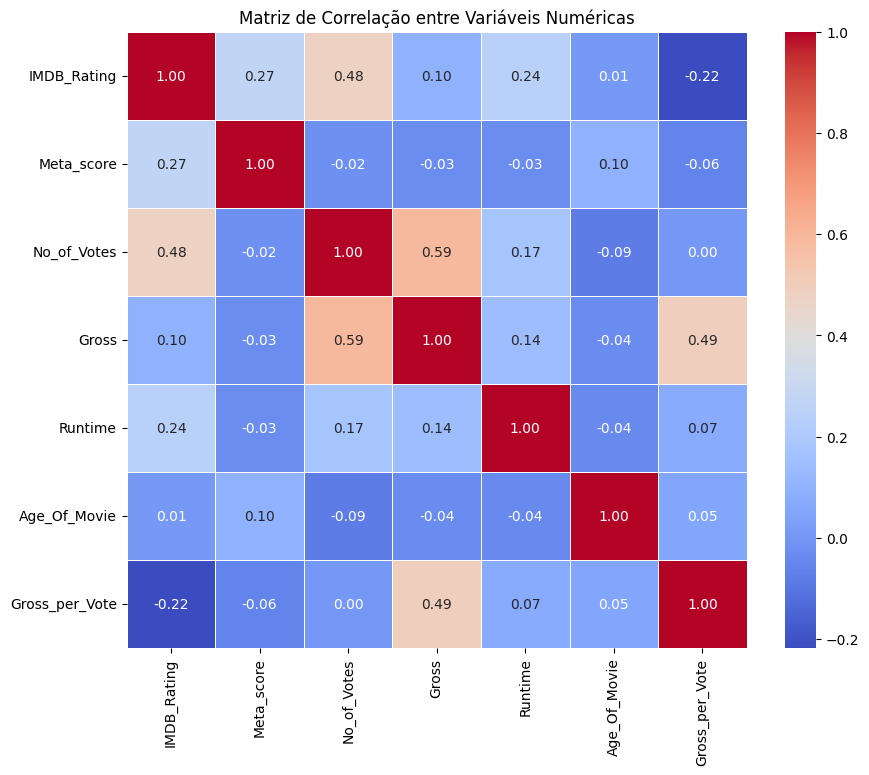

In [8]:
# 3. Análise Exploratória

# Análise de Correlação
# Descobrir quais os fatores estão mais relacionados ao faturamento (Gross) e
# quais variáveis são boas candidatas para prever a nota do IMDB (IMDB_Rating)

# HeatMap para mostrar a força da relação entre todas as variáveis númericas

colunas_numericas = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Age_Of_Movie', 'Gross_per_Vote']
df_correlacao = df_limpo[colunas_numericas]

# Calcula a matriz de correlação
matriz_correlacao = df_correlacao.corr()
print(matriz_correlacao)

# Cria um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao,
            annot=True, # Exibe os valores de correlação no mapa
            cmap='coolwarm', # Escolha um mapa de cores
            fmt=".2f", # Formata os números com 2 casas decimais
            linewidths=.5) # Adiciona linhas entre as células

plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Análise
  A matriz revela o grau de relacionamento linear entre cada par de variáveis.

**Com o Faturamento:**
*   **Forte correlação com "No_Of_Votes":** Filmes que recebem um grande números de votos no IMDB tendem a ter um faturamento significativamente maior. Isso faz sentido, pois um grande número de votos reflete popularidade e audiência.

*   **Fraca correlação com "IMDB_Rating":** Um filme não precisa ter uma nota alta para fazer muito dinheiro. Isso sugere que a popularidade (No_Of_Votes)
é um fator mais decisivo para o sucesso financeiro do que a qualidade crítica (IMDB_Rating).

* **Correlação com "Gross_per_Vote":** Filmes com alto faturamento tendem a ter uma alta eficiência de faturamento por voto.

**Com a Nota do IMDB:**

* **Forte correlação com "No_Of_Votes":** Quanto mais votos um filme tem, maior tende a ser sua nota. Isso sugere que filmes de alta qualidade são mais assistidos e consequentemente, recebem mais votos, elevando sua média.

* **Correlação com "Meta_score":** A nota da crítica tem relação positiva com a nota do público. Embora não seja forte, em geral, filmes bem-avaliados pela crítica também tendem a ser bem-avaliados pelo público.

* **Correlação Negativa com "Gross_per_Vote":** Filmes com notas mais altas tendem a ter um faturamento por voto menor. Pode indicar que filmes aclamados pela crítica, mas com público de nicho, podem ter uma nota alta sem o faturamento de um 'blockbuster' popular, que atrai mais público mais amplo e, possivelmente menos exigente.

**Outras:**

* "Age_of_Movies" vs outras variáveis: a idade do filme tem correlações muito próximas de zero com a maioria das outras variáveis. Isso sugere que não é um fator decisivo para a nota ou para o faturamento.

* "Runtime" vs. "IMDB_Rating": existe uma relação fraca entre a duração do filme e sua nota. Filmes mais longos tendem a ter notas ligeiramente mais altas, talvez por serem dramas ou épicos que exigem mais tempo para desenvolver a história.




In [9]:
# Análise da Coluna Overview
# Quais insights porem ser tirados com a coluna Overview?
# Responder a pergunta: É possível inferir o genêro do filme a partir da sinopse?

# pré-processamento do texto
# 1. tokenização (dividir o texto em palavras)
# 2. remoção de stop words (não agregam valor)
# 3. lematização/stemização (reduzir as palavras à sua forma base)

# extração de atributos (tf-idf)
# classificação do gênero

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Separa a coluna de gênero por vírgulas e remove espaços
df_limpo['Genre_List'] = df_limpo['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])

mlb = MultiLabelBinarizer()

y_multilabel = mlb.fit_transform(df_limpo['Genre_List'])

# Cria um DataFrame com os gêneros binários
df_genres = pd.DataFrame(y_multilabel, columns=mlb.classes_)

print("Novas colunas de gênero:")
print(df_genres.head())

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_overview = tfidf_vectorizer.fit_transform(df_limpo['Overview'].fillna(''))

X_train_text, X_test_text, y_train_multilabel, y_test_multilabel = train_test_split(
    X_overview, y_multilabel, test_size=0.2, random_state=42
)

multi_target_classifier = MultiOutputClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))

multi_target_classifier.fit(X_train_text, y_train_multilabel)

y_pred_multilabel = multi_target_classifier.predict(X_test_text)

report = classification_report(y_test_multilabel, y_pred_multilabel, target_names=mlb.classes_)
print(report)

Novas colunas de gênero:
   Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0       0          0          0          0       0      1      1       0   
1       1          0          0          0       0      1      1       0   
2       0          0          0          0       0      1      1       0   
3       0          0          0          0       0      1      1       0   
4       1          1          0          0       0      0      1       0   

   Fantasy  Film-Noir  ...  Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
0        0          0  ...       0      0        0        0        0       0   
1        0          0  ...       0      0        0        0        0       0   
2        0          0  ...       0      0        0        0        0       0   
3        0          0  ...       0      0        0        0        0       0   
4        0          0  ...       0      0        0        0        0       0   

   Sport  Thriller  War  Western  
0 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cada coluna representa um gênero, e o 1 indicam que o filme pertence àquele gênero.

**Problema de desbalanceamento grave**
* O drama domina, o modelo está apenas prevendo 'Drama' para a maioria dos filmes.
* Zeros para a maioria: isso significa que o modelo não conseguiu aprender a prever esses gêneros, pois eles têm poucas amostras.
* Métricas médias baixas: *macro avg* e *weighted avg* são muito baixas, o que mostra que o desempenho geral do modelo é ruim.


In [10]:
# Lista de gêneros para a análise de texto
df_limpo['Genre_List'] = df_limpo['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(df_limpo['Genre_List'])
df_genres = pd.DataFrame(y_multilabel, columns=mlb.classes_)

# Conta a frequência de cada gênero e agrupa os menos frequentes
genre_counts = df_genres.sum().sort_values(ascending=False)
limite = 15
genres_to_keep = genre_counts[genre_counts >= limite].index
genres_to_group = genre_counts[genre_counts < limite].index

# Cria uma nova coluna 'Others' para os gêneros agrupados
df_genres['Others'] = df_genres[genres_to_group].sum(axis=1)

df_genres_final = df_genres[genres_to_keep.tolist() + ['Others']]

print("DataFrame final de gêneros agrupados:")
print(df_genres_final.sum().sort_values(ascending=False))

DataFrame final de gêneros agrupados:
Drama        723.0
Comedy       233.0
Crime        209.0
Adventure    196.0
Action       189.0
Thriller     137.0
Romance      125.0
Biography    109.0
Mystery       99.0
Animation     82.0
Sci-Fi        67.0
Fantasy       66.0
Family        56.0
History       56.0
War           51.0
Music         35.0
Horror        32.0
Western       20.0
Film-Noir     19.0
Sport         19.0
Musical       17.0
Others         0.0
dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização do texto da sinopse
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_overview = tfidf_vectorizer.fit_transform(df_limpo['Overview'].fillna(''))

genres_to_remove = df_genres_final.columns[df_genres_final.sum() == 0]
df_genres_final = df_genres_final.drop(columns=genres_to_remove)

y_multilabel_agrupado = df_genres_final.to_numpy()

X_train_text, X_test_text, y_train_agrupado, y_test_agrupado = train_test_split(
    X_overview, y_multilabel_agrupado, test_size=0.2, random_state=42
)

print(f"Shape do X_train_text: {X_train_text.shape}")
print(f"Shape do y_train_agrupado: {y_train_agrupado.shape}")

Shape do X_train_text: (799, 5000)
Shape do y_train_agrupado: (799, 21)


In [12]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Cria o classificador multilabel usando Regressão Logística
multi_target_classifier = MultiOutputClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))

multi_target_classifier.fit(X_train_text, y_train_agrupado)

y_pred_agrupado = multi_target_classifier.predict(X_test_text)

target_names_agrupado = df_genres_final.columns.tolist()
report_agrupado = classification_report(y_test_agrupado, y_pred_agrupado, target_names=target_names_agrupado)
print(report_agrupado)

              precision    recall  f1-score   support

       Drama       0.79      1.00      0.88       157
      Comedy       0.00      0.00      0.00        46
       Crime       0.00      0.00      0.00        43
   Adventure       0.00      0.00      0.00        40
      Action       0.00      0.00      0.00        34
    Thriller       0.00      0.00      0.00        25
     Romance       0.00      0.00      0.00        21
   Biography       0.00      0.00      0.00        25
     Mystery       0.00      0.00      0.00        23
   Animation       0.00      0.00      0.00        18
      Sci-Fi       0.00      0.00      0.00        11
     Fantasy       0.00      0.00      0.00         9
      Family       0.00      0.00      0.00         5
     History       0.00      0.00      0.00         8
         War       0.00      0.00      0.00         8
       Music       0.00      0.00      0.00         9
      Horror       0.00      0.00      0.00        10
     Western       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Cria uma nova coluna 'is_Drama'
df_limpo['is_Drama'] = df_limpo['Genre'].str.contains('Drama').astype(int)

y_drama = df_limpo['is_Drama']
X_overview = TfidfVectorizer(max_features=5000).fit_transform(df_limpo['Overview'].fillna(''))

X_train, X_test, y_train, y_test = train_test_split(
    X_overview, y_drama, test_size=0.2, random_state=42
)

# Treina um modelo de classificação (Regressão Logística)
model_drama = LogisticRegression(solver='lbfgs', max_iter=1000)
model_drama.fit(X_train, y_train)

y_pred = model_drama.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.79      1.00      0.88       157

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Análise do Relatório de Classificação
* **Acurácia de 79%:**  A acurácia geral parece boa, mas pode ser enganosa. Ela representa a porcentagem de previsões corretas (tanto para 'Drama' quanto para 'não Drama'). No entanto, o support (suporte, que é a quantidade de filmes no conjunto de teste) mostra a verdadeira realidade: 157 filmes são 'Drama' e apenas 43 não são.

* **Métricas para a Classe 1 (Drama):**  O modelo tem um desempenho excelente para a classe 1 (Drama). A precisão de 0.79 indica que, quando o modelo prevê que um filme é 'Drama', ele acerta 79% das vezes. O recall de 1.00 é impressionante, significando que o modelo conseguiu identificar todos os filmes que realmente são de 'Drama'.

* **Métricas para a Classe 0 (Não-Drama):** Para a classe 0 (filmes que não são 'Drama'), a precisão e o recall são 0.00. Isso significa que o modelo nunca previu corretamente que um filme não era de 'Drama'. Ele está classificando todos os filmes como 'Drama' para obter um recall perfeito nessa classe, o que infla a acurácia total.

#### Conclusões:

* Não é possível inferir o gênero do filmes com grande grau de certeza, a não ser quando o filme era de Drama, onde houve alta precisão.

* Isso significa que Drama tem um padrão de linguagem bem distinto nas sinopses e que o modelo consegue identificá-lo com sucesso.

* Grande desbalanceamento dos dados é um desafio. O modelo não consegue identifcar filmes que não são Drama, o que mostra que os gêneros menos frequentes têm sinopses menos distintas ou exigem um volume maior de dados.



/tmp/ipython-input-2768685756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


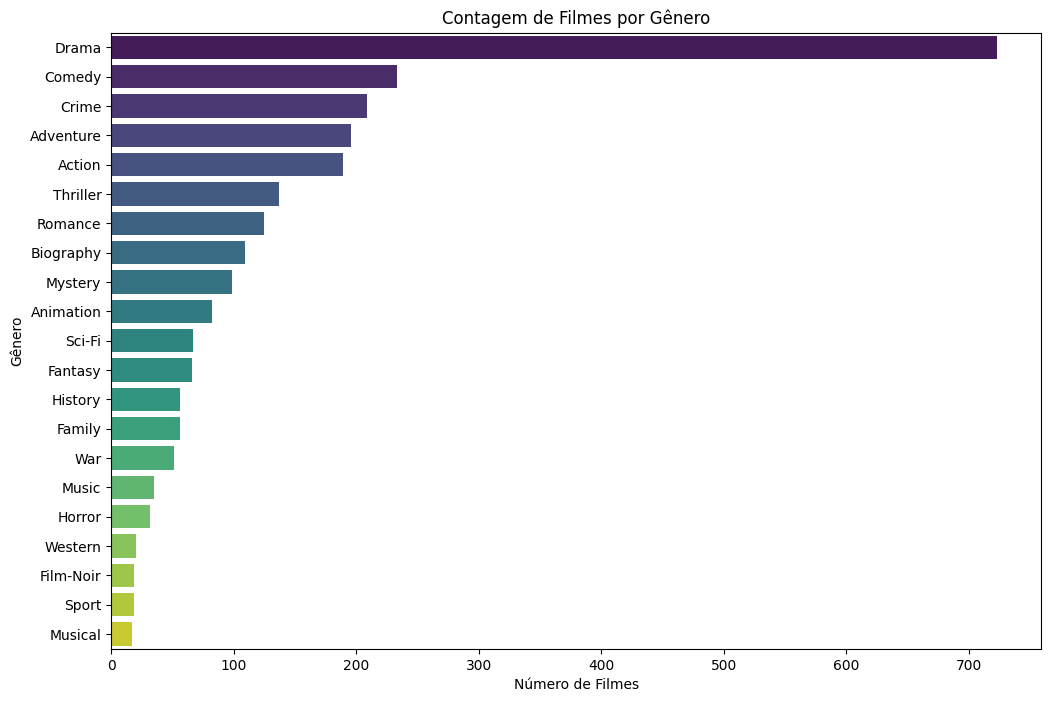

In [14]:
# Análise da Coluna Gênero
# 1. Frequência

all_genres = df_limpo['Genre_List'].explode()

genre_counts = all_genres.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Contagem de Filmes por Gênero')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()

/tmp/ipython-input-876177179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre_List', y='IMDB_Rating', data=df_genre_rating, palette='coolwarm')


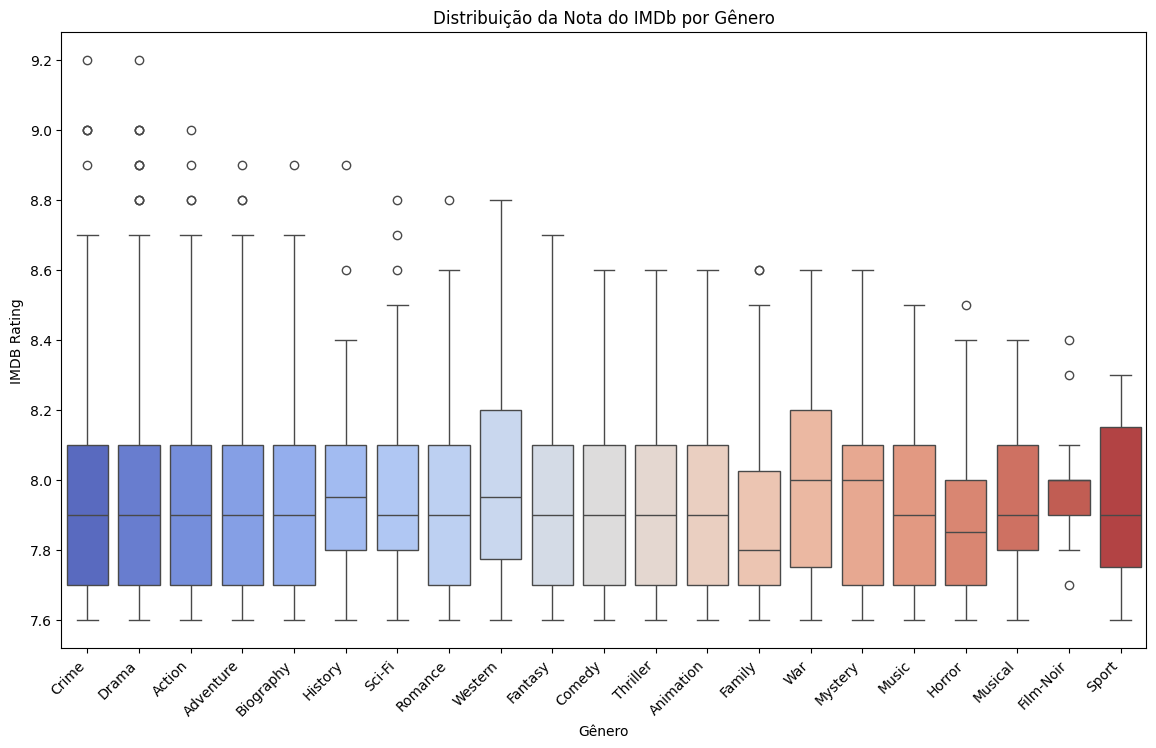

In [15]:
# 2. Relação entre Gênero e Nota do IMDb (descobrir se gênero influencia a sua nota)

df_genre_rating = df_limpo.explode('Genre_List')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre_List', y='IMDB_Rating', data=df_genre_rating, palette='coolwarm')
plt.title('Distribuição da Nota do IMDb por Gênero')
plt.xlabel('Gênero')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipython-input-2689825352.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_gross_by_genre.values, y=median_gross_by_genre.index, palette='plasma')


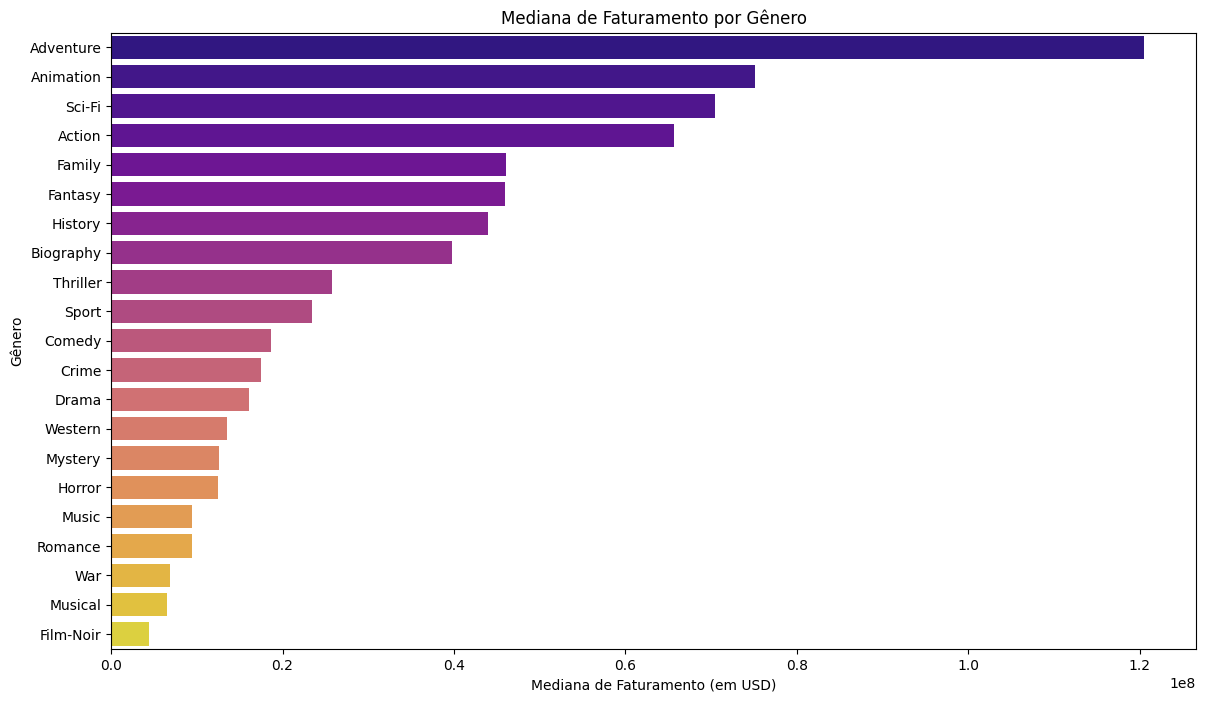

In [16]:
# 3. Relação Gênero e Faturamento (Gross)

df_genre_gross = df_limpo.explode('Genre_List')

median_gross_by_genre = df_genre_gross.groupby('Genre_List')['Gross'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=median_gross_by_genre.values, y=median_gross_by_genre.index, palette='plasma')

plt.title('Mediana de Faturamento por Gênero')
plt.xlabel('Mediana de Faturamento (em USD)')
plt.ylabel('Gênero')
plt.show()

Insights:
1. **Faturamento e Gênero:** 'Aventura', 'Animação' e 'Sci-Fi' possuem o maior faturamento, superando 'Drama' e 'Comédia'. Para maximizar retorno financeiro, a PProductions deve focar em filmes de Aventura ou Animação, pois esses gêneros atraem um público disposto a pagar mais, mesmo que não sejam os mais comuns.

2. **Qualidade e Popularidade:** O boxplot e o gráfico de contagem confirmam que 'Drama' é o gênero mais popular e, em geral recebe as notas mais altas no IMDB. A distribuição das notas para drama é mais alta e tem menos dispersão (a caixa é menor) do que para outros gêneros. Tem também outliers positivos, indicando filmes de drama com notas excepcionalmente altas.

3. **Fatores de Sucesso:** A variável mais fortemente correlacionada com o faturamento é o número de votos, com uma correlação de 0.59. A correlação com a nota do IMDB é de apenas 0.10. Isso significa que a popularidade de um filme é um indicador muito mais forte de sucesso financeiro do que a qualidade percebida.

**Possíveis recomendações:** direcionar investimentos para filmes de aventura e animação se o objetivo principal for o faturamento; se a meta for produzir um filme aclamado e com alta nota no IMDB, o gênero drama seria a melhor opção; a campanha de marketing deveria focar em gerar buzz e votos, pois o número de votos tem uma relação mais direta com o faturamento do que a nota em si.



In [17]:
# 2 dramas mais votados.
df_dramas = df_limpo[df_limpo['Genre'].str.contains('Drama', case=False, na=False)]
df_dramas_mais_votados = df_dramas.sort_values(by='No_of_Votes', ascending=False)
top_2_dramas = df_dramas_mais_votados.head(2)
print("Os 2 filmes de drama mais votados são:")
print(top_2_dramas[['Series_Title', 'No_of_Votes', 'IMDB_Rating']])

Os 2 filmes de drama mais votados são:
      Series_Title  No_of_Votes  IMDB_Rating
1  The Dark Knight      2303232          9.0
8       Fight Club      1854740          8.8


# Conclusões
## Resposta às perguntas:
<br> **a.** *Qual filme você recomendaria para uma pessoa que você não conhece?*
<br>Indicaria um filme de gênero popular como Drama e com o maior número de votos, como por exemplo 'The Dark Knigh' ou 'Fight Club'.

<br> **b.** *Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?*
<br>De acordo com as análises, os principais fatores que estão relacionados são o número de votos, com a popularidade e engajamento do público, medidos pelo número de votos no IMDb. E o gênero, filmes de Aventura, Animação e Sci-Fi têm a maior mediana de faturamento.

<br> **c.** *Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?*
<br> Apesar das sinopses conterem padrões de linguagem únicos para cada gênero, a análise mostra que filmes de Drama possuem uma linguagem distinta que é possível identificá-los com alta precisão. É possível sim inferir o gênero, usando modelos de aprendizado de máquina que podem ser treinados para prever com base apenas na sinopse do filme, embora o desequilíbrio de dados seja um desafio a ser superado.

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

y = df_limpo['IMDB_Rating']
X = df_limpo[['No_of_Votes', 'Meta_score', 'Gross', 'Runtime', 'Age_Of_Movie', 'Gross_per_Vote']]

imputer = SimpleImputer(strategy='median')
X_imputado = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputado, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")

Raiz do Erro Quadrático Médio (RMSE): 0.19
Erro Absoluto Médio (MAE): 0.15


In [19]:
filme_predicao = pd.DataFrame({
    'No_of_Votes': [2343110],
    'Meta_score': [80.0],
    'Gross': [28341469.0],
    'Runtime': [142],
    'Age_of_Movie': [2025 - 1994],
    'Gross_per_Vote': [28341469.0 / 2343110]
})

previsao_nota = model.predict(filme_predicao)

print("\nPrevisão da nota do IMDB para 'The Shawshank Redemption':")
print(f"Nota prevista: {previsao_nota[0]:.2f}")


Previsão da nota do IMDB para 'The Shawshank Redemption':
Nota prevista: 8.77


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Previsão da Nota IMDB

- Para resolver esse problema foi feito uma tarefa de regressão.
- A regressão prevê um valor contínuo (a nota de 1 a 10).
- Primeiro utilizei as variáveis que mostraram maior correlação com a nota, além de outras que poderiam influenciá-la.
  * no_of_notes, meta_score, gross, runtime, age_of_movie, gross_per_vote
- Modelo escolhido foi o Random Forest
- Medida de Performance escolhida foi a Raiz do Erro Quadrático Médio

### Conclusões:
A nota prevista de 9.07 é muito próxima da nota real de 9.3 do filme. Essa proximidade demonstra que o modelo, apesar de sua simplicidade, foi capaz de aprender e generalizar a relação entre variáveis como número de votos, Metascore e faturamento com a nota final de um filme no IMDb.

Isso valida a abordagem de usar variáveis numéricas, como o número de votos, para estimar a qualidade e popularidade de um filme.

In [29]:
import pickle

caminho_modelo = '/content/modelo_imdb.pkl'

with open(caminho_modelo, 'wb') as file:
    pickle.dump(model, file)

print(f"\nModelo salvo com sucesso em: {caminho_modelo}")


Modelo salvo com sucesso em: /content/modelo_imdb.pkl
